In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, multilabel_confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the iris dataset
data = load_iris()
X = data.data
y = data.target
labels = list(data.target_names)

In [3]:
# add noise to the data
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.concatenate((X, random_state.randn(n_samples, 200 * n_features)), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=random_state)


In [4]:
# build model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)

              precision    recall  f1-score   support

      setosa       0.55      0.91      0.69        23
  versicolor       0.44      0.14      0.22        28
   virginica       0.57      0.67      0.62        24

    accuracy                           0.55        75
   macro avg       0.52      0.57      0.51        75
weighted avg       0.52      0.55      0.49        75



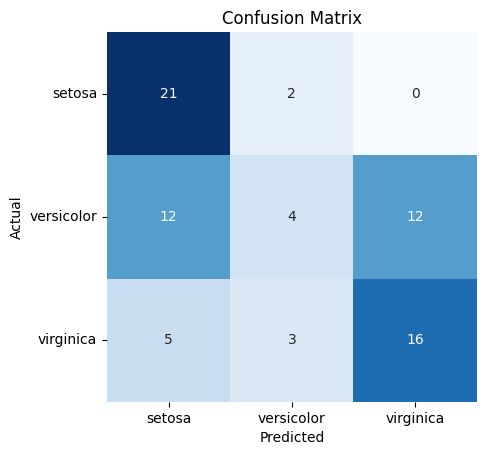

In [5]:
# plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(conf_mat, cmap="Blues", square=True, cbar=False, annot=True, fmt="g")
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels, rotation=0)

report = classification_report(y_test, y_pred, labels=[0,1,2], target_names=labels)
print(report)

In [6]:
conf_mat = multilabel_confusion_matrix(y_test, y_pred)
report = dict()

for i, name in enumerate(labels):
    TN, FP, FN, TP = conf_mat[i].ravel()
    TPR = TP / (TP + FN) if TP + FN > 0 else 0 # true positive rate
    TNR = TN / (FP + TN) if FP + TN > 0 else 0 # true negative rate
    PPV = TP / (TP + FP) if TP + FP > 0 else 0 # positive predictive value
    report[name] = {
        "TN": TN, # true negative
        "FP": FP, # false positive
        "FN": FN, # false negative
        "TP": TP, # true positive
        "TPR": TPR, # true positive rate
        "Recall": TPR,
        "Sensitivity": TPR,
        "FPR": FP / (FP + TN) if FP + TN > 0 else 0, # false positive rate
        "TNR": TNR, # true negative rate
        "Specificity": TNR,
        "FNR": FN / (TP + FN) if TP + FN > 0 else 0, # false negative rate
        "PPV": PPV, # positive predictive value
        "Precision": PPV,
        "F1 Score": 2 * (PPV * TPR) / (PPV + TPR) if PPV + TPR > 0 else 0
    }

report = pd.DataFrame(report)
report

,setosa,versicolor,virginica
TN,35.000000,42.000000,39.000000
FP,17.000000,5.000000,12.000000
FN,2.000000,24.000000,8.000000
TP,21.000000,4.000000,16.000000
TPR,0.913043,0.142857,0.666667
Recall,0.913043,0.142857,0.666667
Sensitivity,0.913043,0.142857,0.666667
FPR,0.326923,0.106383,0.235294
TNR,0.673077,0.893617,0.764706
Specificity,0.673077,0.893617,0.764706


In [7]:
report = dict()

# micro: Calculate metrics globally by counting the total true positives, false negatives and false positives.
# macro: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
# weighted: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
for avg in ["micro", "macro", "weighted"]:
    report[avg] = {
        "Precision": precision_score(y_test, y_pred, average=avg),
        "Recall": recall_score(y_test, y_pred, average=avg),
        "F1 Score": f1_score(y_test, y_pred, average=avg)
    }

report = pd.DataFrame(report)
report

,micro,macro,weighted
Precision,0.546667,0.522835,0.518257
Recall,0.546667,0.574189,0.546667
F1 Score,0.546667,0.506708,0.488791
